In [3]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”


 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [5]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

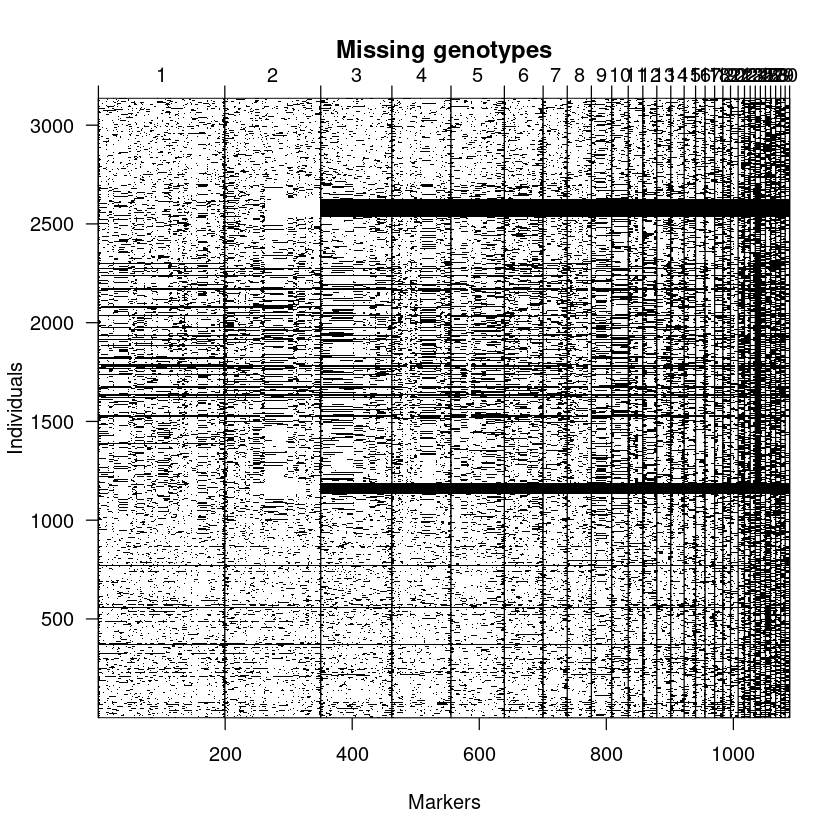

In [6]:
plotMissing(datf2)

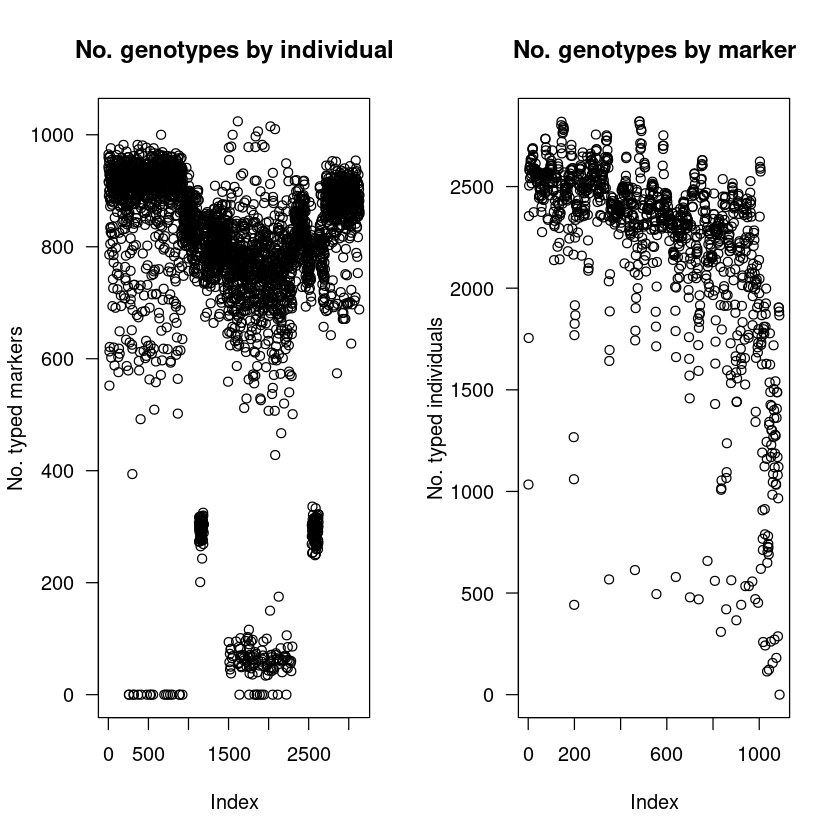

In [7]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [8]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [9]:
todrop

[1] "30-6"

In [10]:
datf2.1 <- drop.markers(datf2, todrop)

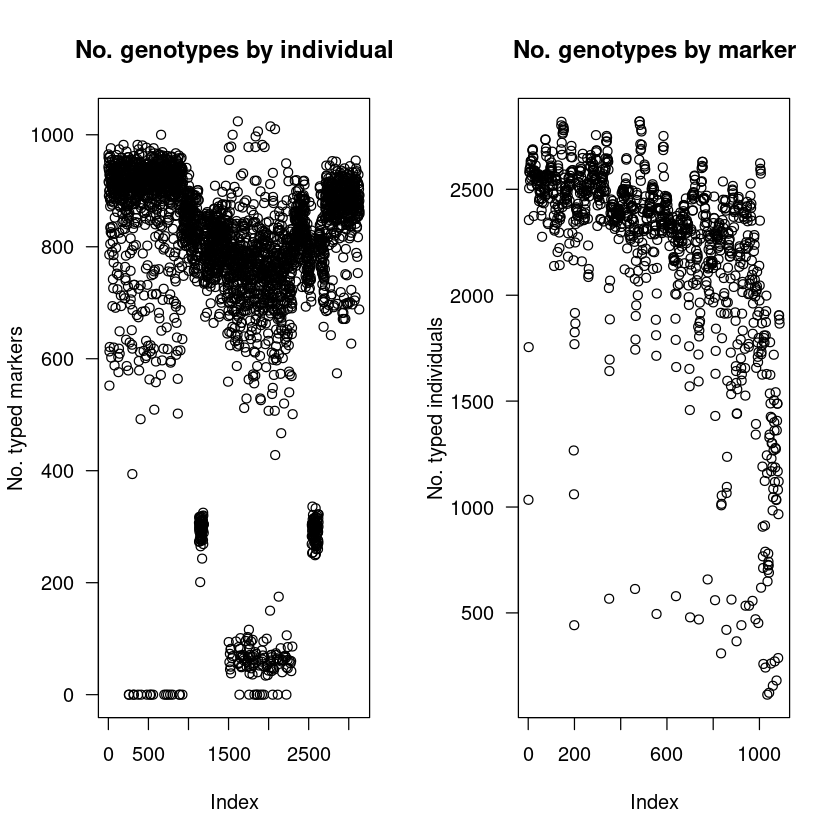

In [11]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [12]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [13]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3135

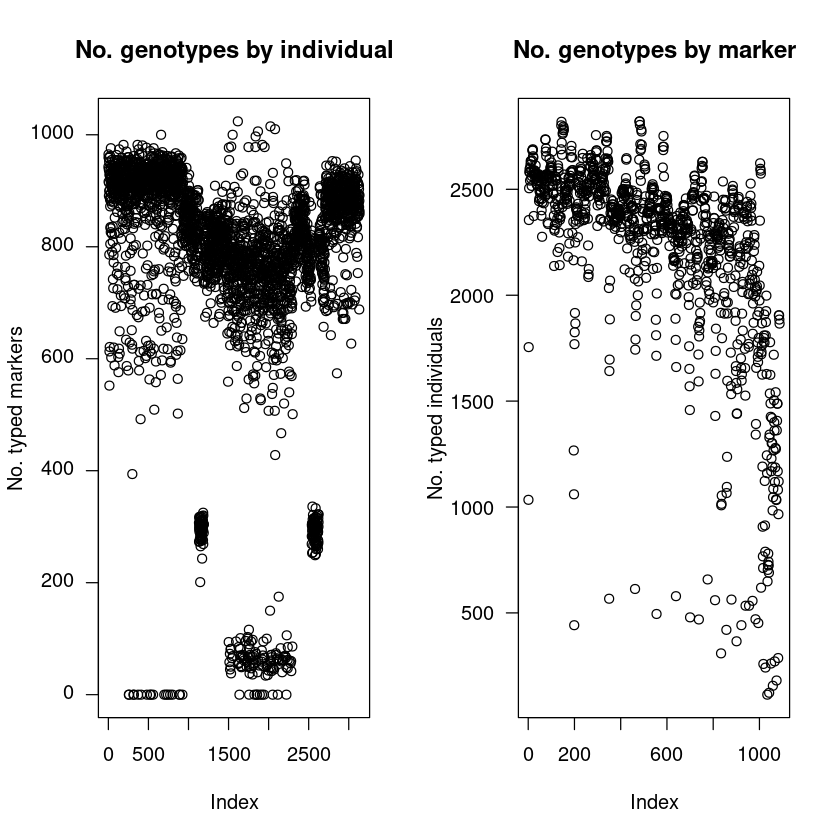

In [14]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [15]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1087 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 6 
    Percent genotyped:  70.9 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [16]:
cg <- comparegeno(datf2.2)

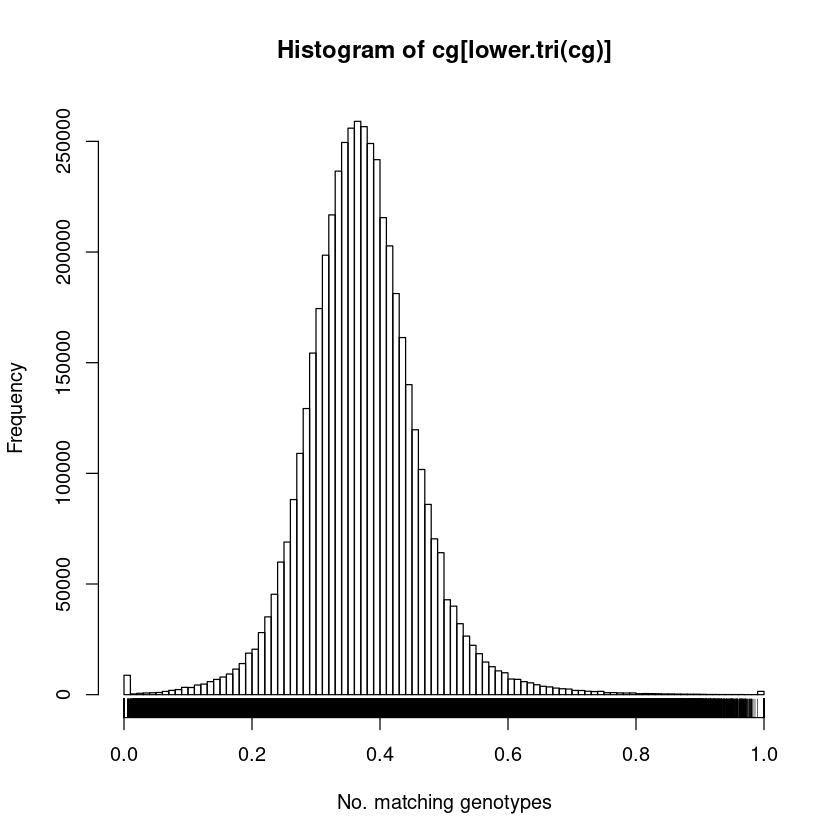

In [17]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [18]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [19]:
wh

,row,col
91202,368,538
128202,515,538
59402,7,682
128402,112,682
91202,368,682
128602,538,682
128602,538,851
95102,682,851
128902,689,851
91202,368,874


In [20]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1" "1-2"

$`1-194`
[1] "1-195" "1-196" "1-197" "1-198"

$`2-3`
[1] "2-0" "2-1" "2-2"

$`2-146`
[1] "2-147" "2-148" "2-149" "2-150"

$`3-3`
[1] "3-0" "3-1" "3-2"

$`3-107`
[1] "3-108" "3-109" "3-110" "3-111"

$`4-3`
[1] "4-0" "4-1" "4-2"

$`4-55`
[1] "4-56"

$`4-88`
[1] "4-89" "4-90" "4-91"

$`5-3`
[1] "4-92" "5-0"  "5-1"  "5-2" 

$`5-8`
[1] "5-9"

$`5-79`
[1] "5-80" "5-81" "5-82"

$`6-3`
[1] "5-83" "6-0"  "6-1"  "6-2" 

$`6-56`
[1] "6-57" "6-58" "6-59"

$`7-3`
[1] "6-60" "7-0"  "7-1"  "7-2" 

$`7-7`
[1] "7-8"

$`7-33`
[1] "7-34" "7-35" "7-36" "7-37"

$`8-3`
[1] "8-0" "8-1" "8-2"

$`8-33`
[1] "8-34" "8-35" "8-36" "8-37"

$`9-3`
[1] "9-0" "9-1" "9-2"

$`9-19`
[1] "9-18"

$`9-27`
[1] "9-28" "9-29" "9-30" "9-31"

$`10-3`
[1] "10-0" "10-1" "10-2"

$`10-21`
[1] "10-22" "10-23" "10-24" "10-25"

$`11-3`
[1] "11-0" "11-1" "11-2"

$`11-18`
[1] "11-19" "11-20" "11-21" "11-22"

$`12-3`
[1] "12-0" "12-1" "12-2"

$`12-17`
[1] "12-18" "12-19" "12-20"

$`13-3`
[1] "12-21" "13-0"  "

In [21]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [22]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-0,1,2101,136,608,290,0,0,1.209695e-17
1-1,1,1380,279,908,568,0,0,7.436830e-22
1-2,1,780,417,1155,783,0,0,1.288092e-25
1-3,1,630,453,1236,816,0,0,1.149925e-23
1-4,1,554,500,1275,806,0,0,1.456785e-16
1-5,1,539,502,1293,801,0,0,1.084951e-15
1-6,1,554,504,1281,796,0,0,4.193705e-15
1-7,1,594,501,1260,780,0,0,4.551296e-14
1-8,1,532,536,1281,786,0,0,2.704136e-11


In [23]:
length(todrop)

[1] 693

In [24]:
datf2.3 <- datf2.2

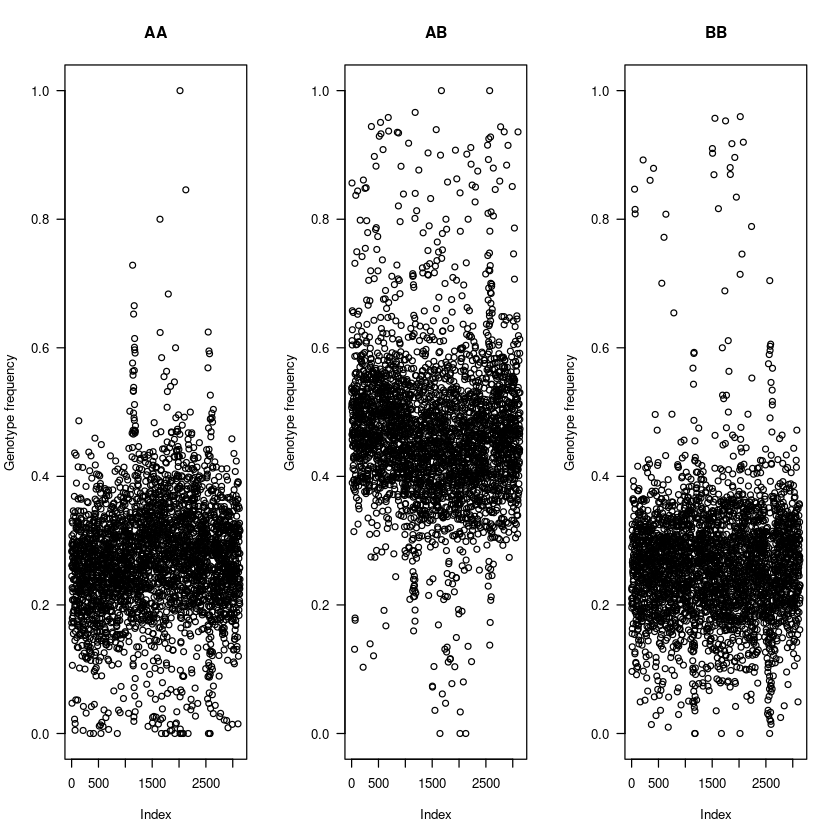

In [25]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

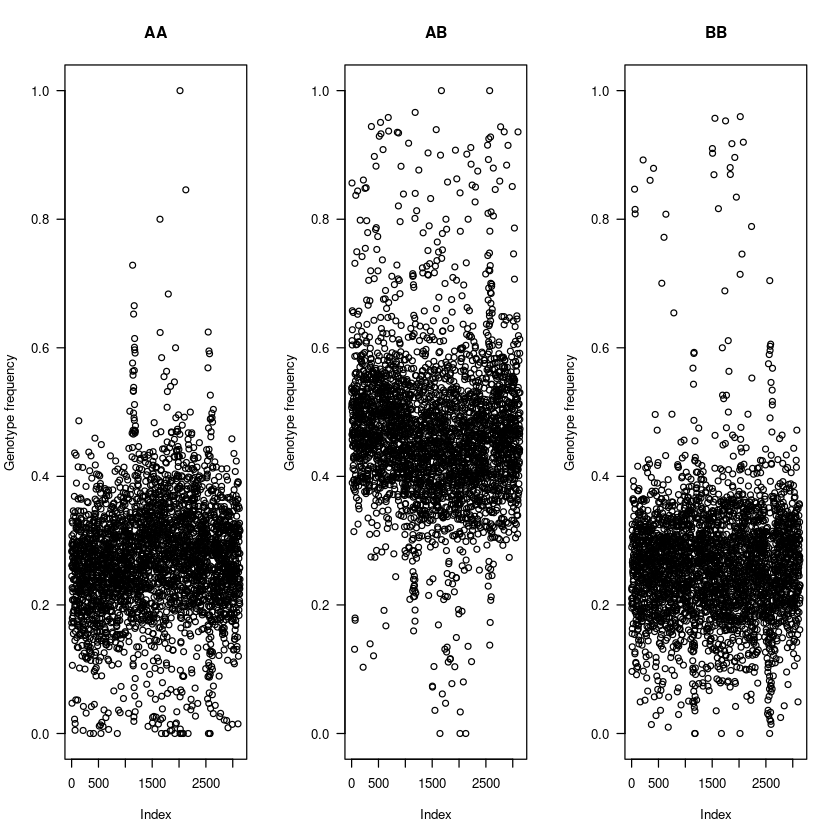

In [26]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [ ]:
### do not filter for gfreq

In [ ]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [ ]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [27]:
datf2.4 <- datf2.3

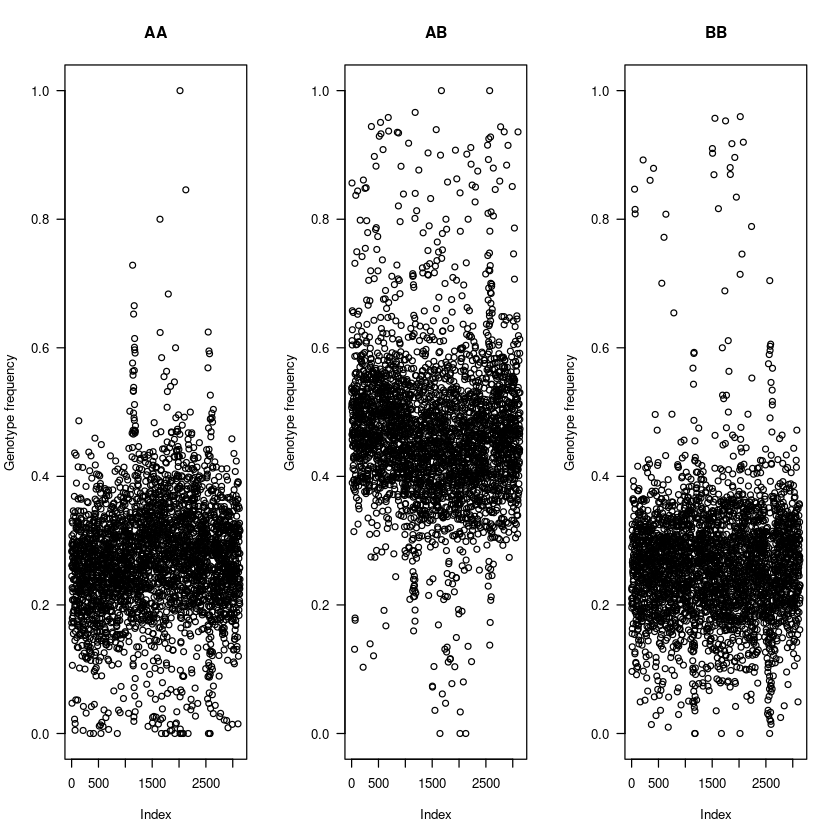

In [28]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [29]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

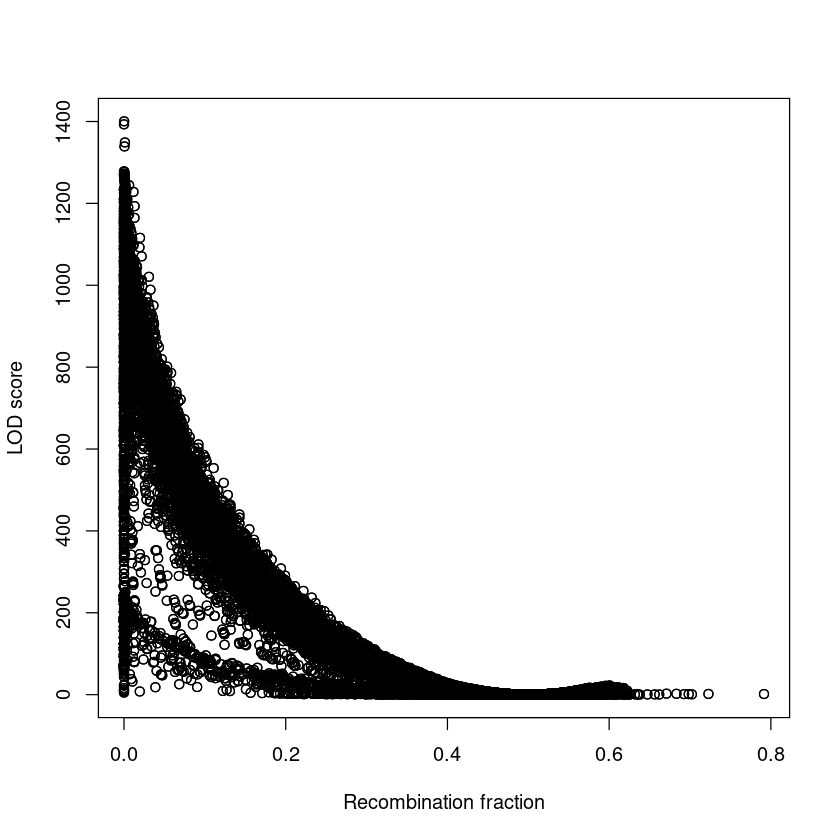

In [30]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

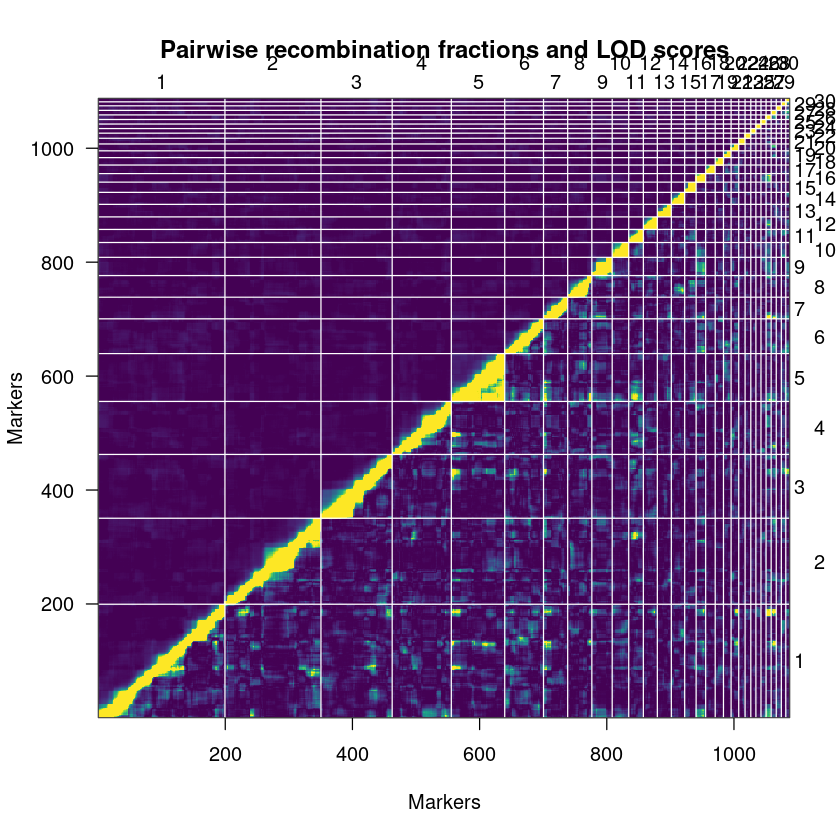

In [31]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [ ]:
datf2.5 <- datf2.4

In [ ]:
plotPheno(datf2.5, pheno.col=3)

In [ ]:
#write.cross(datf2.5, format = 'csv', '20201125_cross')

In [ ]:
#test = read.cross(file='20201125_cross.csv',
#                  format='csv',
#                  crosstype =  'f2',
#                 genotypes = c('AA','AB','BB',"C","D"))

In [ ]:
#test$pheno['BW8']!='NA'

In [10]:
test2 <- subset(datf2.5, ind=test$pheno['BW8']!='NA')

In [ ]:
summary(test2)

# Spike in phenotypes that have been precorrected using a simple OLS
(to avoid this whole shrinkage thing)

In [11]:
resid_fix = read.table('20201201_residuals_precorrected_for_sex_and_generation_as_fixed_effects.csv', sep = ',', header = TRUE)

In [12]:
length(resid_fix$sex_gen_resid)

[1] 3073

In [13]:
test2$pheno['fix_precorrBW8'] <- resid_fix$sex_gen_resid

# spike in precorrected phenos

In [14]:
resid = read.table('20201125_residuals_precorrected_for_sex_and_generation.csv', sep = ',', header = TRUE)

In [9]:
length(resid$sex_gen_resid)

[1] 3073

In [15]:
test2$pheno['precorrBW8'] <- resid$sex_gen_resid

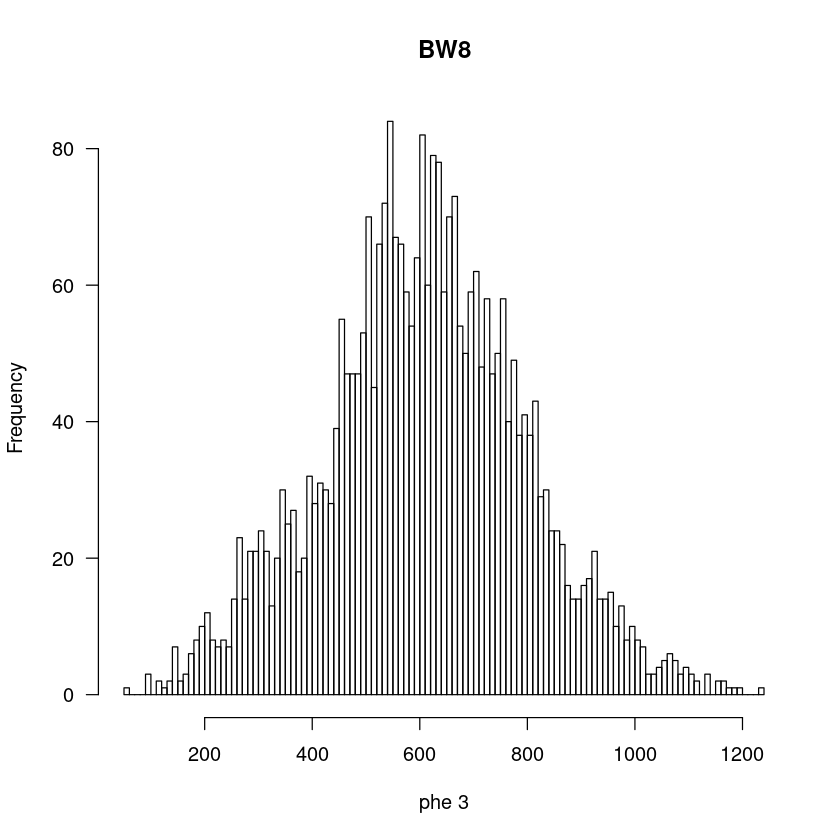

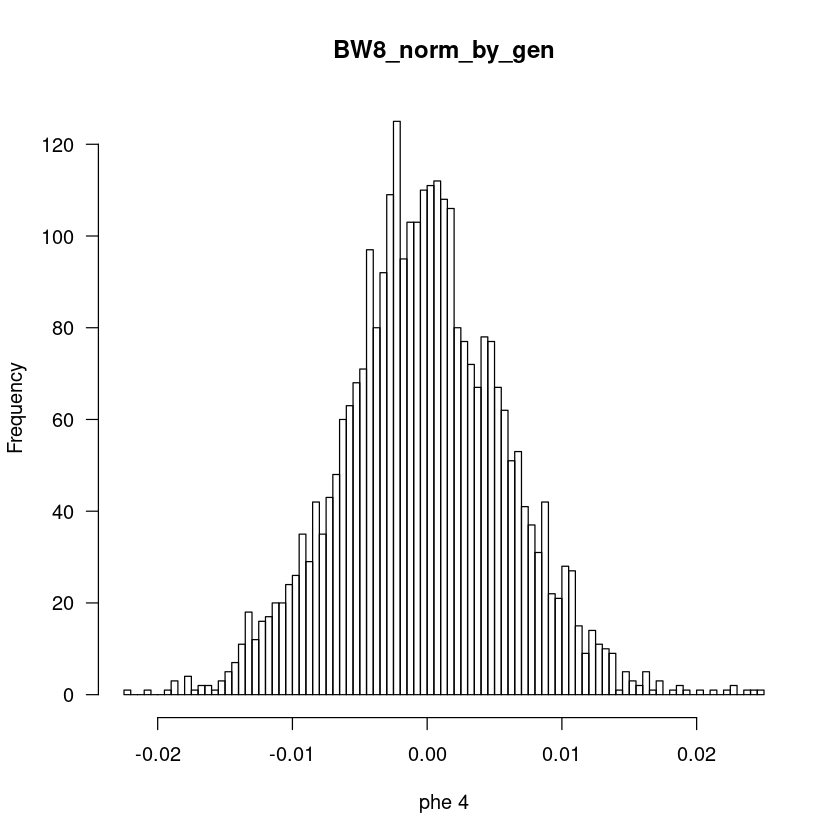

In [7]:
plotPheno(test2, pheno.col = 3)
plotPheno(test2, pheno.col = 4)

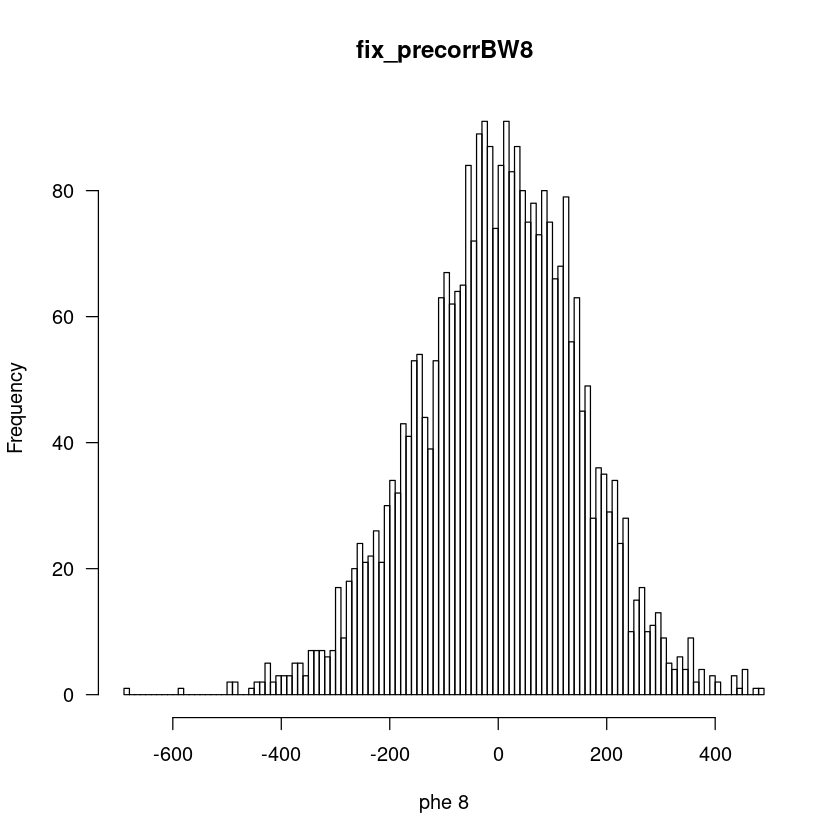

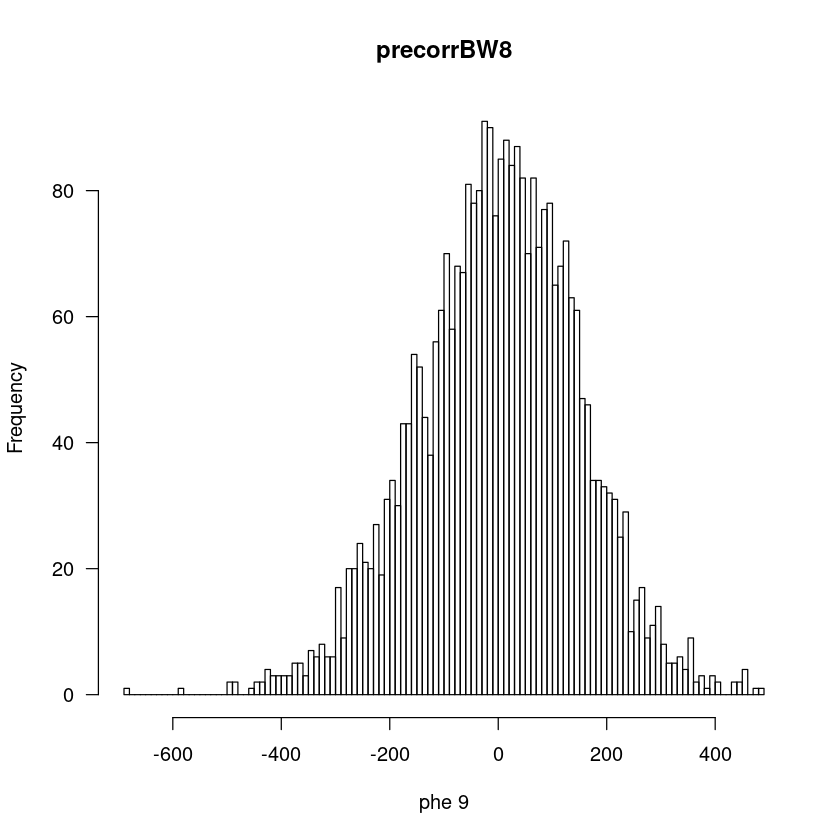

In [64]:
plotPheno(test2, pheno.col = 8, c='red')
plotPheno(test2, pheno.col = 9, c='red')

# calculate genotype probabilities

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [16]:
test2 <- calc.genoprob(test2, step=1)

In [17]:
test2 <- calc.genoprob(test2, step=0, off.end = 0)


### get covar_matrices

In [18]:
ac <- pull.pheno(test2, c("SEX", 'GENERATION')) 

In [19]:
ac_sex <- pull.pheno(test2, c("SEX" )) 

# run scan

In [20]:
# No Generation correction, sex as additive covariate
out.hk.AC <- scanone(test2, pheno.col =3, addcovar=ac_sex,  method='hk') 

In [21]:
# Normalised Phgenotypes within generation, sex as additive covariate 
out.hk.normBW8 <- scanone(test2, pheno.col =4, addcovar=ac_sex,  method='hk') 

In [22]:
# precorrected phenotypes - residuals from ols with sex and generation as fixed effects
out.hk.precor_fixed <- scanone(test2, pheno.col = 8,  method='hk') 

In [23]:
# precorrected phenotypes - residuals from lmm with sex as fixed effect and generation as random effect
out.hk.precor_random <- scanone(test2, pheno.col = 9,  method='hk') 

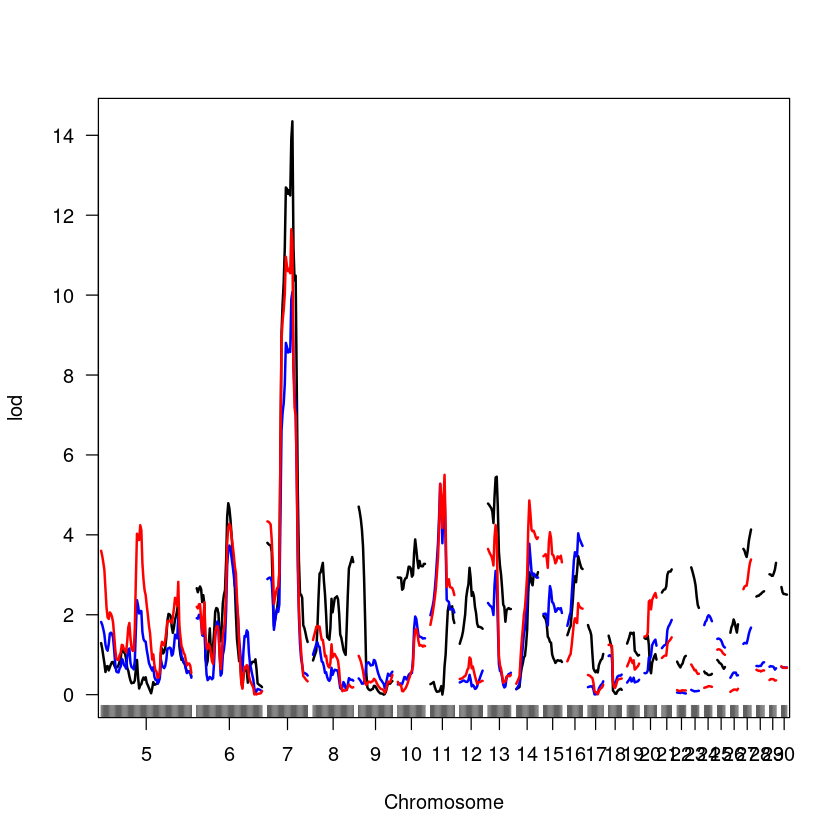

In [19]:
plot(out.hk.AC, out.hk.precor_fixed, out.hk.normBW8, chr=seq(5,30))

# get significance thresholds

## for fixed_effect-correction

In [89]:
out.hk.precor_fix.perm <- scanone(test2, pheno.col = 8,  method='hk', n.perm = 10000) 

Doing permutation in batch mode ...


In [90]:
test2chr4 = subset(test2, chr=4)

In [91]:
out.hk.precor_fix.chr4.perm <- scanone(test2chr4, pheno.col = 8,  method='hk', n.perm = 10000) 

Doing permutation in batch mode ...


In [92]:
summary(out.hk.precor_fix.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.79
10% 3.44

In [93]:
summary(out.hk.precor_fix.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.71
10% 2.36

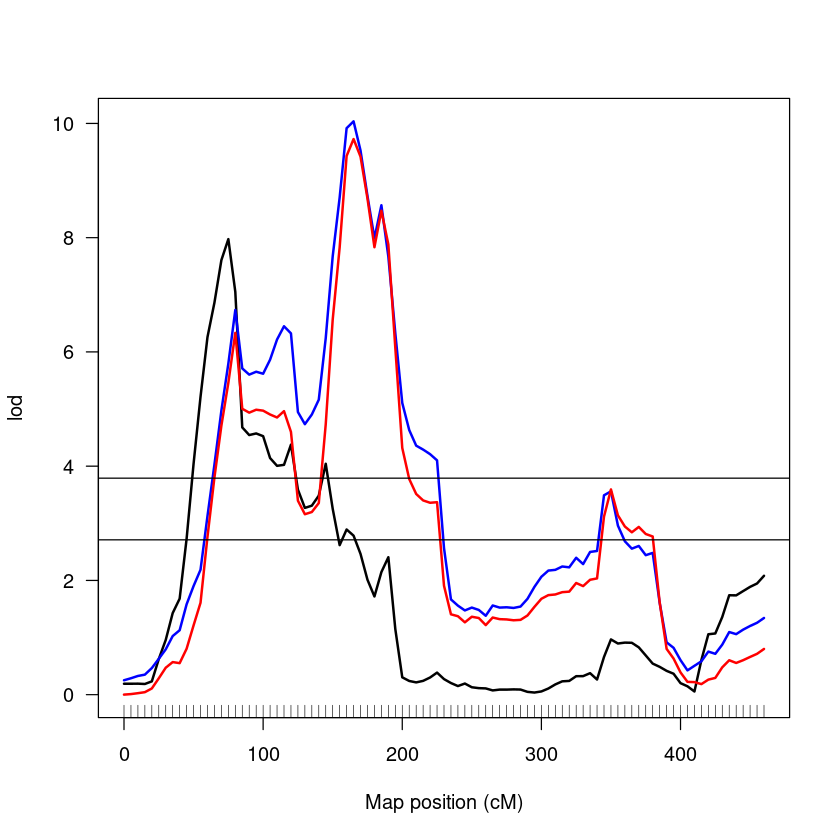

In [52]:
plot(out.hk.AC, out.hk.precor_fixed, out.hk.normBW8, chr=4)
abline(h=3.79)
abline(h=2.71)

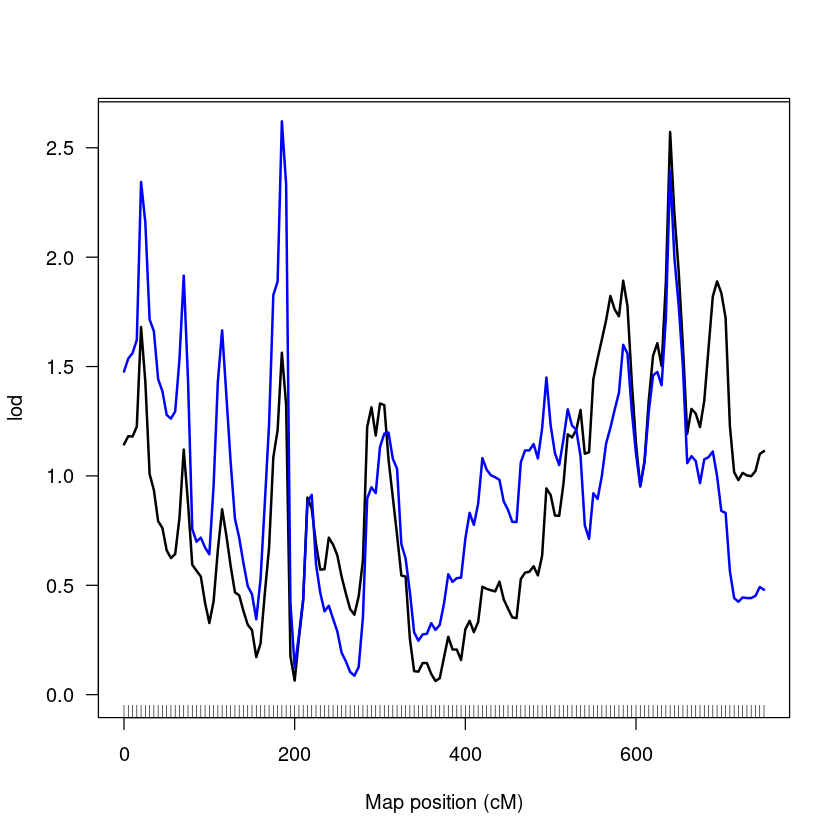

In [50]:
plot(out.hk.precor_fixed, out.hk.normBW8, chr=2)
abline(h=3.79)
abline(h=2.71)

## for no generation correction

In [16]:
out.hk.AC.perm <- scanone(test2, pheno.col = 3,addcovar = ac_sex,  method='hk', n.perm = 10000) 
out.hk.AC.chr4.perm <- scanone(test2chr4, pheno.col = 3, addcovar = ac_sex,  method='hk', n.perm = 10000) 

Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [26]:
summary(out.hk.AC.perm)
summary(out.hk.AC.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.80
10% 3.48

LOD thresholds (10000 permutations)
     lod
5%  2.73
10% 2.38

## for normalised phenotypes 

In [17]:
out.hk.normBW8.perm <- scanone(test2, pheno.col = 4,  method='hk', addcovar = ac_sex, n.perm = 10000) 

Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [95]:
test2chr4 = subset(test2, chr=4)

In [18]:
out.hk.normBW8.chr4.perm <- scanone(test2chr4, pheno.col = 4,  method='hk', addcovar = ac_sex, n.perm = 10000) 

Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [24]:
summary(out.hk.normBW8.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.80
10% 3.47

In [25]:
summary(out.hk.normBW8.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.67
10% 2.35

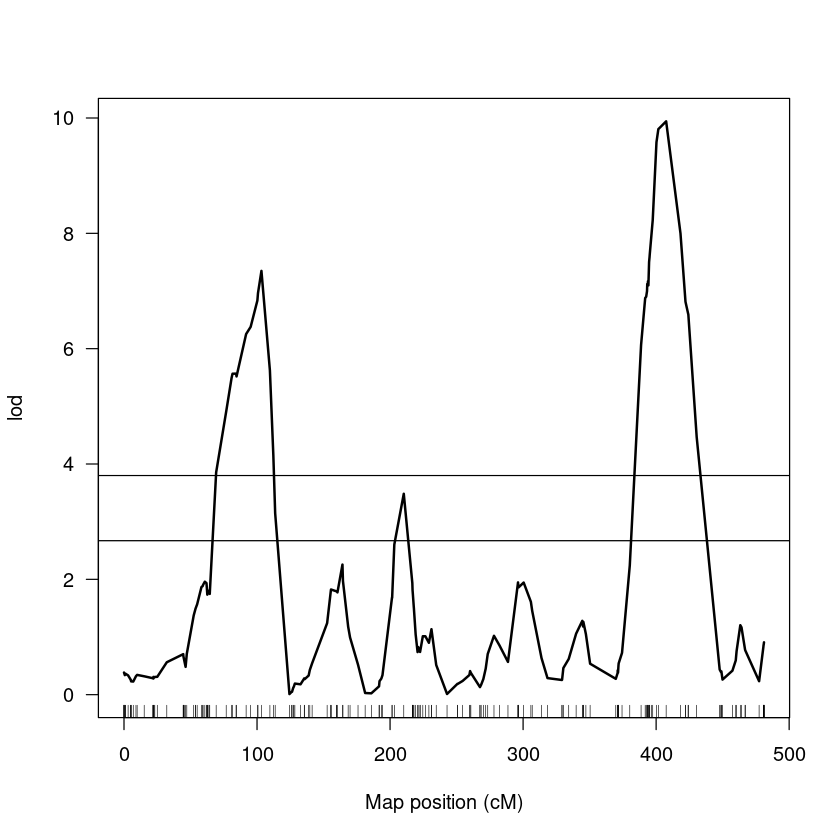

In [25]:
plot(out.hk.normBW8, chr=1)
abline(h=3.8)
abline(h=2.67)

In [24]:
save.image(file = "20201201_rqtl_all_fixedprecorr_andnormbw_perm.Rdata")

In [1]:
load('20201201_rqtl_all_fixedprecorr_andnormbw_perm.Rdata')

# extract positions

In [9]:
summary(out.hk.precor_fixed, threshold = 3.79)
summary(out.hk.precor_fixed, threshold = 2.71)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,9.841316
3-75,3,375,4.934423
4-33,4,165,10.036388
7-23,7,115,10.076736
11-9,11,45,5.276165
16-10,16,50,4.038097


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,9.841316
3-75,3,375,4.934423
4-33,4,165,10.036388
6-30,6,150,3.731956
7-23,7,115,10.076736
11-9,11,45,5.276165
13-7,13,35,3.096924
14-12,14,60,3.778309
15-6,15,30,2.716670


In [10]:
summary(out.hk.precor_random, threshold = 3.8)
summary(out.hk.precor_random, threshold = 2.7)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,9.845071
3-75,3,375,4.924490
4-33,4,165,9.956716
7-23,7,115,10.121808
11-9,11,45,5.219465
16-10,16,50,4.052608


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,9.845071
3-75,3,375,4.924490
4-33,4,165,9.956716
6-30,6,150,3.743495
7-23,7,115,10.121808
11-9,11,45,5.219465
13-7,13,35,3.113191
14-12,14,60,3.775766
15-6,15,30,2.712772


In [14]:
summary(out.hk.normBW8, threshold = 3.81)
summary(out.hk.normBW8, threshold = 2.7)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,11.060334
3-75,3,375,6.610315
4-33,4,165,9.725914
5-36,5,180,4.240537
6-30,6,150,4.275930
7-22,7,110,11.648934
11-13,11,65,5.501468
13-7,13,35,4.245435
14-12,14,60,4.859922


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-170,1,850,11.060334
3-75,3,375,6.610315
4-33,4,165,9.725914
5-36,5,180,4.240537
6-30,6,150,4.275930
7-22,7,110,11.648934
11-13,11,65,5.501468
13-7,13,35,4.245435
14-12,14,60,4.859922


In [ ]:
out.

In [ ]:
summary(out.hk.AC, threshold = 3.77)
summary(out.hk.AC, threshold = 2.)

In [3]:
chrom <- summary(out.hk.precor_fixed, threshold = 3.79)$chr
pos <- summary(out.hk.precor, threshold = 3.79)$pos

ERROR: Error in summary(out.hk.precor_fixed, threshold = 3.79)$chr: $ operator is invalid for atomic vectors


In [ ]:
chrom_sugg <- summary(out.hk.precor, threshold = 2.7)$chr
pos_sugg <- summary(out.hk.precor, threshold = 2.7)$pos

In [ ]:
#summary(out.hk.precor, threshold = 2.7, format = 'allpeaks')

In [ ]:
plot(out.hk.precor, chr=4)

In [ ]:
qtls <- makeqtl(test2, chr = chrom_sugg, pos = pos_sugg, what = 'prob')

In [ ]:
fit_sugg <- fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests=TRUE)

In [ ]:
length(chrom_sugg)

In [ ]:
chrom <- chrom_sugg
pos <- pos_sugg
for (qtl in seq(1,10)){
    curr_chrom <- chrom[qtl]
    curr_pos <- pos[qtl]
    qtls <- makeqtl(test2, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(test2, pheno.col = 3, qtl = qtls, get.ests=TRUE, method = 'hk')
    print(summary(fit_sugg))
}

In [ ]:
#summary(fit_sugg)

In [ ]:
summary(out.hk.AC, threshold = 3.77, format = 'allpeaks')

In [ ]:
summary(out.hk.AC, threshold = 2.69, format = 'allpeaks')

In [ ]:
library('qtl')

# Cell Graveyard

# subset the data to only include Wahlberg F2s

In [ ]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [ ]:
idvec <- IDs[, 'V1']

In [ ]:
idvec <- as.double(idvec)

In [ ]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [ ]:
#subset
datf2= subset(datf2, ind = all_individs)

In [ ]:
summary(datf2)

# subset data to only include Wahlberg Markers

In [ ]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

In [ ]:
datf2 <- pull.markers(datf2, Wahlberg_bins$V2 )